# 안녕하세요^^
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/미프4/'

In [4]:
# 학습/평가 데이터 로딩
x_train = pd.read_csv(path+'train_x.csv')
y_train = pd.read_csv(path+'train_y.csv')
x_test = pd.read_csv(path+'test_x.csv')
y_test = pd.read_csv(path+'test_y.csv')

In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43512 entries, 0 to 43511
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   총생활인구수           43512 non-null  float64
 1   남자0세부터9세생활인구수    43512 non-null  float64
 2   남자10세부터14세생활인구수  43512 non-null  float64
 3   남자15세부터19세생활인구수  43512 non-null  float64
 4   남자20세부터24세생활인구수  43512 non-null  float64
 5   남자25세부터29세생활인구수  43512 non-null  float64
 6   남자30세부터34세생활인구수  43512 non-null  float64
 7   남자35세부터39세생활인구수  43512 non-null  float64
 8   남자40세부터44세생활인구수  43512 non-null  float64
 9   남자45세부터49세생활인구수  43512 non-null  float64
 10  남자50세부터54세생활인구수  43512 non-null  float64
 11  남자55세부터59세생활인구수  43512 non-null  float64
 12  남자60세부터64세생활인구수  43512 non-null  float64
 13  남자65세부터69세생활인구수  43512 non-null  float64
 14  남자70세이상생활인구수     43512 non-null  float64
 15  여자0세부터9세생활인구수    43512 non-null  float64
 16  여자10세부터14세생활인구수  43512 non-null  float64
 17  여자15세부터19세생활

In [6]:
x_train.iloc[0, 66:]

weekday_0    0.0
weekday_1    0.0
weekday_2    0.0
weekday_3    0.0
weekday_4    0.0
weekday_5    0.0
weekday_6    1.0
Name: 0, dtype: float64

In [7]:
x_train.iloc[24*7, 66:]

weekday_0    0.0
weekday_1    0.0
weekday_2    0.0
weekday_3    0.0
weekday_4    0.0
weekday_5    0.0
weekday_6    1.0
Name: 168, dtype: float64

In [8]:
y_train.iloc[0], x_train.iloc[24*7]['총생활인구수'],

(target    31290.0276
 Name: 0, dtype: float64,
 30716.3268)

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [11]:
# LinearRegression 모델 학습
LR = LinearRegression()
LR.fit(x_train, y_train)

# 예측 수행
y_pred = LR.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1673.515686424794
R-squared Score: 0.7775140265526106


### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [12]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 학습
RF = RandomForestRegressor(verbose=2)
RF.fit(x_train, y_train)

# 예측 수행
y_pred = RF.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

building tree 1 of 100


<ipython-input-12-a1256ba4da38>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.3min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

##### RF - feature_importances

In [12]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*a

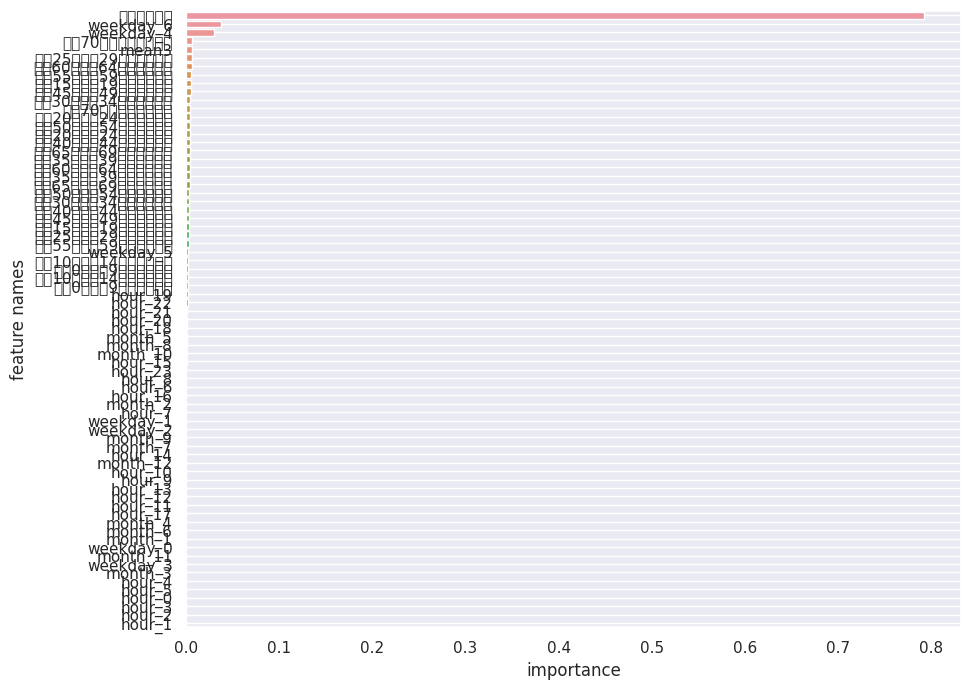

In [14]:
result = plot_feature_importance(RF.feature_importances_, list(x_train))

In [15]:
result

,feature_names,feature_importance
0,총생활인구수,0.792221
1,weekday_6,0.037562
2,weekday_4,0.029715
3,여자70세이상생활인구수,0.006631
4,mean3,0.006571
...,...,...
68,hour_5,0.000133
69,hour_0,0.000109
70,hour_3,0.000044
71,hour_2,0.000039


##### SHAP

In [18]:
!pip install shap

In [16]:
import shap

In [ ]:
explainer_rf = shap.TreeExplainer(RF)
shap_values1 = explainer_rf.shap_values(x_train)

In [ ]:
shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.

# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer1.expected_value, shap_values1[0, :], x_train.iloc[0,:])

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [13]:
from xgboost import XGBRegressor, plot_tree, plot_importance
import numpy as np

XGB = XGBRegressor(objective='reg:squarederror')
XGB.fit(x_train, y_train)

# 예측 수행
y_pred = XGB.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 1556.3102127534128
R-squared Score: 0.8075865635808548


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

##### XGB - feature_importances

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*a

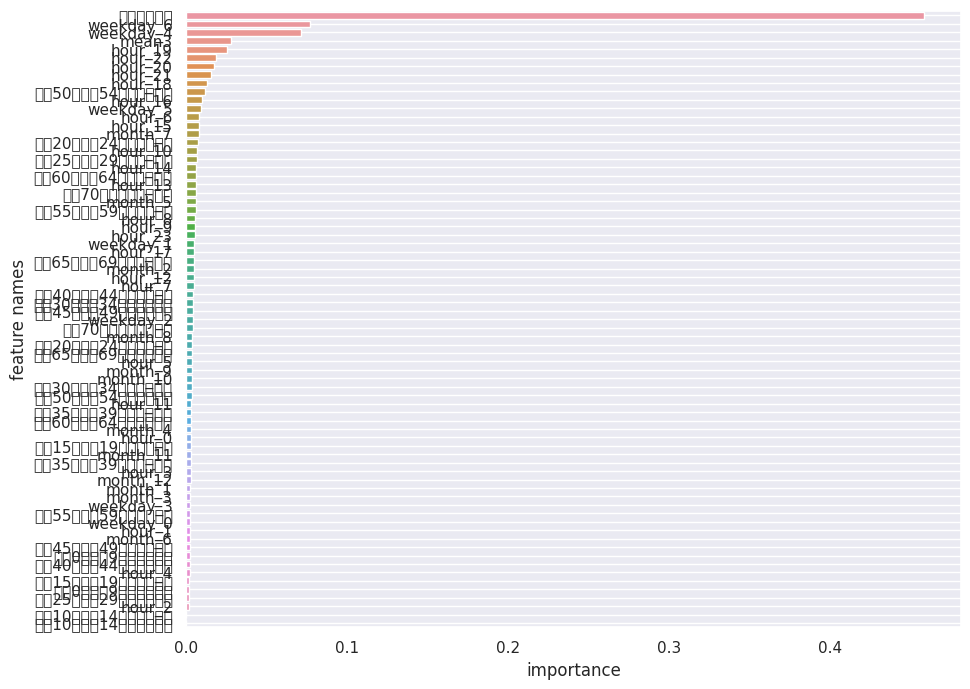

In [16]:
result = plot_feature_importance(XGB.feature_importances_, list(x_train))

In [26]:
result

,feature_names,feature_importance
0,총생활인구수,0.624900
1,month_10,0.011370
2,month_9,0.010688
3,남자55세부터59세생활인구수,0.010513
4,month_2,0.009593
...,...,...
68,weekday_3,0.002309
69,hour_3,0.002272
70,hour_2,0.002220
71,남자10세부터14세생활인구수,0.000000


In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.



#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인




In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요.


In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.



---

# 2. Deep Learning
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [18]:
import tensorflow as tf

X = tf.keras.Input(shape=[x_train.shape[1]])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dropout(0.7)(H)
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.6)(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.mean_squared_error)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 73)]              0         
                                                                 
 flatten (Flatten)           (None, 73)                0         
                                                                 
 dropout (Dropout)           (None, 73)                0         
                                                                 
 dense (Dense)               (None, 128)               9472      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                             

In [19]:
# 모델 학습 (1010번 weight 조정)
model.fit(x_train, y_train, epochs=100, verbose=0)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1360/1360 [==============================] - 10s 7ms/step - loss: 163067840.0000
Epoch 2/10
1360/1360 [==============================] - 9s 6ms/step - loss: 150811888.0000
Epoch 3/10
1360/1360 [==============================] - 10s 7ms/step - loss: 139240208.0000
Epoch 4/10
1360/1360 [==============================] - 10s 7ms/step - loss: 129528944.0000
Epoch 5/10
1360/1360 [==============================] - 9s 7ms/step - loss: 119347848.0000
Epoch 6/10
1360/1360 [==============================] - 10s 7ms/step - loss: 109935040.0000
Epoch 7/10
1360/1360 [==============================] - 10s 7ms/step - loss: 101724608.0000
Epoch 8/10
1360/1360 [==============================] - 9s 7ms/step - loss: 93698784.0000
Epoch 9/10
1360/1360 [==============================] - 10s 7ms/step - loss: 87218992.0000
Epoch 10/10
1360/1360 [==============================] - 9s 7ms/step - loss: 79460832.0000


In [20]:
model.evaluate(x_test, y_test)

135/135 [==============================] - 1s 2ms/step - loss: 70217120.0000


70217120.0

In [23]:
y_pred = model.predict(x_test)
score = r2_score(y_test, y_pred)
score

135/135 [==============================] - 0s 3ms/step


-4.578096742252882